In [1]:
import tensorflow as tf
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import fit_plot, get_PU_labels


from multilayer_perceptron import MultilayerPerceptron
from pu_learning import (
    ClassDepLossMultilayerPerceptron,
    HardBoostrappingMultilayerPerceptron
)

In [2]:
# Network Parameters
n_input = 2
n_classes = 2

In [3]:
X, y = datasets.make_moons(n_samples=800, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.5, random_state=42)
Y_train = np.eye(n_classes)[y_train]
print(X_train.shape)
print(Y_train.shape)

(400, 2)
(400, 2)


# Multilayer Perceptron without PU

('Epoch:', '0001', 'cost=', '0.722988635')
('Epoch:', '0011', 'cost=', '0.613236934')
('Epoch:', '0021', 'cost=', '0.574431613')
('Epoch:', '0031', 'cost=', '0.551090032')
('Epoch:', '0041', 'cost=', '0.527148977')
('Epoch:', '0051', 'cost=', '0.520959750')
('Epoch:', '0061', 'cost=', '0.518961206')
('Epoch:', '0071', 'cost=', '0.518134236')
('Epoch:', '0081', 'cost=', '0.517192796')
('Epoch:', '0091', 'cost=', '0.516676724')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

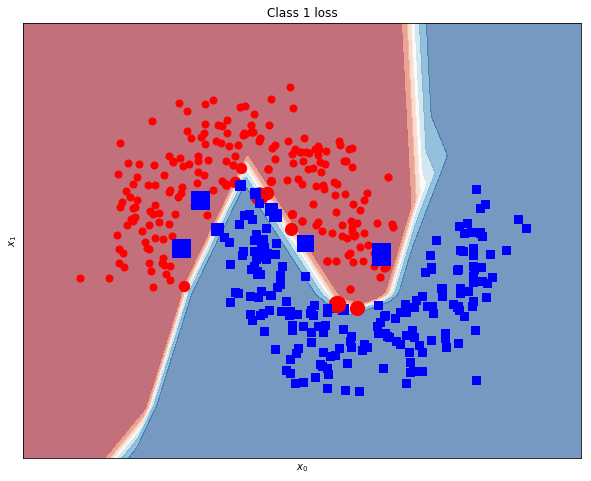

In [4]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=1e-2,
                          regularization=0,
                          training_epochs=100,
                          verbose=True)
fit_plot(X_train, Y_train, mp, "loss")

# PU setup

In [6]:
Y_train_pu = get_PU_labels(Y_train, random_seed=42)

### Normal

('Epoch:', '0001', 'cost=', '0.697991610')
('Epoch:', '0011', 'cost=', '0.621282086')
('Epoch:', '0021', 'cost=', '0.617288277')
('Epoch:', '0031', 'cost=', '0.614769757')
('Epoch:', '0041', 'cost=', '0.613325506')
('Epoch:', '0051', 'cost=', '0.612455159')
('Epoch:', '0061', 'cost=', '0.611669227')
('Epoch:', '0071', 'cost=', '0.610928908')
('Epoch:', '0081', 'cost=', '0.608832553')
('Epoch:', '0091', 'cost=', '0.608014926')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

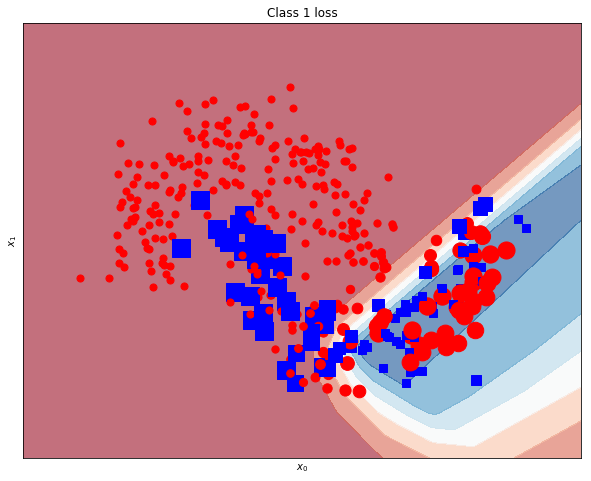

In [9]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          regularization=0,
                          training_epochs=100,
                          imbalanced=False,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), mp, "loss")

### Imbalance learning

('Using class_weight', array([ 1.        ,  3.23157895]))
('Epoch:', '0001', 'cost=', '0.820817336')
('Epoch:', '0011', 'cost=', '0.773525178')
('Epoch:', '0021', 'cost=', '0.744838372')
('Epoch:', '0031', 'cost=', '0.739026666')
('Epoch:', '0041', 'cost=', '0.737351254')
('Epoch:', '0051', 'cost=', '0.736250922')
('Epoch:', '0061', 'cost=', '0.735701799')
('Epoch:', '0071', 'cost=', '0.735425755')
('Epoch:', '0081', 'cost=', '0.735271662')
('Epoch:', '0091', 'cost=', '0.734854117')
('Epoch:', '0101', 'cost=', '0.734703615')
('Epoch:', '0111', 'cost=', '0.734730080')
('Epoch:', '0121', 'cost=', '0.734377339')
('Epoch:', '0131', 'cost=', '0.734244108')
('Epoch:', '0141', 'cost=', '0.734403983')
('Epoch:', '0151', 'cost=', '0.734800652')
('Epoch:', '0161', 'cost=', '0.734028101')
('Epoch:', '0171', 'cost=', '0.733924657')
('Epoch:', '0181', 'cost=', '0.733965889')
('Epoch:', '0191', 'cost=', '0.733946189')
('Using class_weight', array([ 1.        ,  3.23157895]))


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

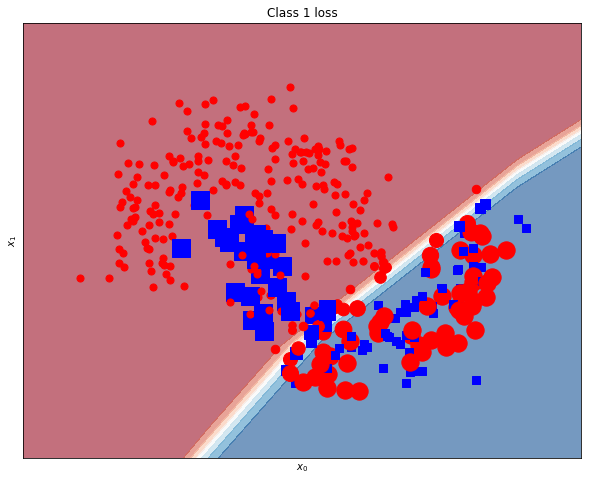

In [11]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          regularization=0,
                          training_epochs=200,
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), mp, "loss")

### Class weighted

('Using class_weight', array([ 1.        ,  6.46315789]))
('Epoch:', '0001', 'cost=', '1.025211170')
('Epoch:', '0011', 'cost=', '0.980576470')
('Epoch:', '0021', 'cost=', '0.942144871')
('Epoch:', '0031', 'cost=', '0.926692724')
('Epoch:', '0041', 'cost=', '0.917720541')
('Epoch:', '0051', 'cost=', '0.910786197')
('Epoch:', '0061', 'cost=', '0.903754279')
('Epoch:', '0071', 'cost=', '0.893264756')
('Epoch:', '0081', 'cost=', '0.879515320')
('Epoch:', '0091', 'cost=', '0.869779631')
('Epoch:', '0101', 'cost=', '0.860847518')
('Epoch:', '0111', 'cost=', '0.854742691')
('Epoch:', '0121', 'cost=', '0.850285381')
('Epoch:', '0131', 'cost=', '0.846964076')
('Epoch:', '0141', 'cost=', '0.844498098')
('Epoch:', '0151', 'cost=', '0.842582420')
('Epoch:', '0161', 'cost=', '0.840925381')
('Epoch:', '0171', 'cost=', '0.839589849')
('Epoch:', '0181', 'cost=', '0.838224128')
('Epoch:', '0191', 'cost=', '0.837004751')
('Using class_weight', array([ 1.        ,  6.46315789]))
('Using class_weight', a

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

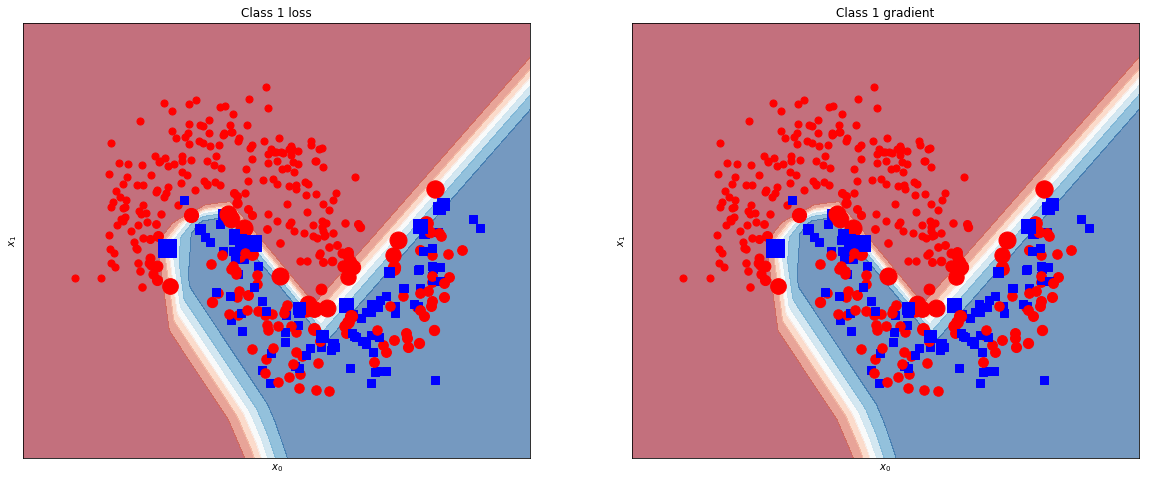

In [14]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          regularization=0,
                          training_epochs=200,
                          class_weight=[.5, 1],
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), mp, ["loss", "gradient"])

('Using class_weight', array([  1.        ,  49.32432432]))
('Epoch:', '0001', 'cost=', '1.640059829')
('Epoch:', '0006', 'cost=', '1.494116634')
('Epoch:', '0011', 'cost=', '1.463618040')
('Epoch:', '0016', 'cost=', '1.469334513')
('Epoch:', '0021', 'cost=', '1.452478945')
('Epoch:', '0026', 'cost=', '1.477922022')
('Epoch:', '0031', 'cost=', '1.457108617')
('Epoch:', '0036', 'cost=', '1.447636873')
('Epoch:', '0041', 'cost=', '1.458520919')
('Epoch:', '0046', 'cost=', '1.453888655')
('Epoch:', '0051', 'cost=', '1.451359451')
('Epoch:', '0056', 'cost=', '1.443751514')
('Epoch:', '0061', 'cost=', '1.442150891')
('Epoch:', '0066', 'cost=', '1.448779523')
('Epoch:', '0071', 'cost=', '1.444395274')
('Epoch:', '0076', 'cost=', '1.437684059')
('Epoch:', '0081', 'cost=', '1.427543491')
('Epoch:', '0086', 'cost=', '1.437185615')
('Epoch:', '0091', 'cost=', '1.450518906')
('Epoch:', '0096', 'cost=', '1.532763034')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

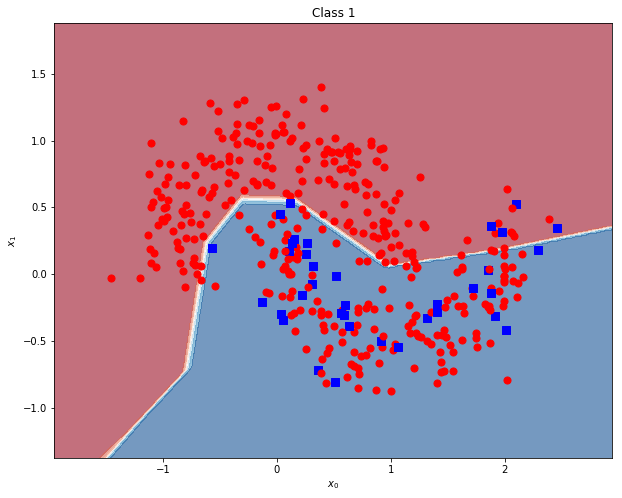

In [26]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          regularization=0,
                          training_epochs=100,
                          class_weight=[.2, 1],
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.8), mp)

### Class dependent loss

('Using class_weight', array([ 1.        ,  6.46315789]))
('Epoch:', '0001', 'cost=', '0.696923271')
('Epoch:', '0006', 'cost=', '0.614209682')
('Epoch:', '0011', 'cost=', '0.566589579')
('Epoch:', '0016', 'cost=', '0.540927902')
('Epoch:', '0021', 'cost=', '0.526545204')
('Epoch:', '0026', 'cost=', '0.518406831')
('Epoch:', '0031', 'cost=', '0.509348862')
('Epoch:', '0036', 'cost=', '0.502461158')
('Epoch:', '0041', 'cost=', '0.496914282')
('Epoch:', '0046', 'cost=', '0.492081173')
('Epoch:', '0051', 'cost=', '0.487790920')
('Epoch:', '0056', 'cost=', '0.484088615')
('Epoch:', '0061', 'cost=', '0.480604351')
('Epoch:', '0066', 'cost=', '0.477361791')
('Epoch:', '0071', 'cost=', '0.474414028')
('Epoch:', '0076', 'cost=', '0.471560389')
('Epoch:', '0081', 'cost=', '0.468520060')
('Epoch:', '0086', 'cost=', '0.466569498')
('Epoch:', '0091', 'cost=', '0.464344516')
('Epoch:', '0096', 'cost=', '0.462380581')
('Epoch:', '0101', 'cost=', '0.461881354')
('Epoch:', '0106', 'cost=', '0.45915832

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

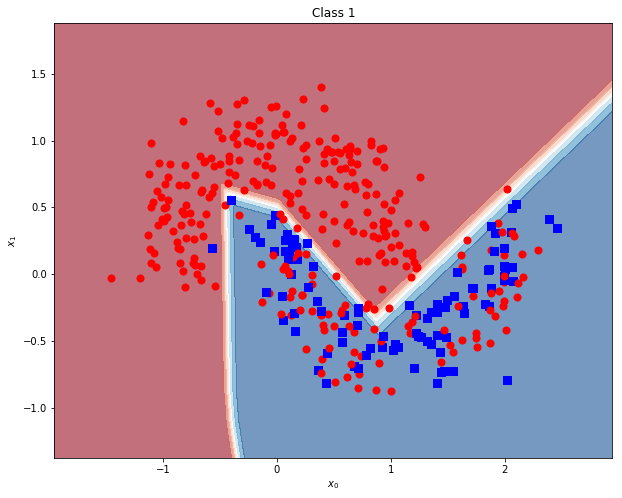

In [37]:
cdmp = ClassDepLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          regularization=0,
                          training_epochs=200,
                          class_weight=[0.5, 1],
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), cdmp)

('Using class_weight', array([ 1.        ,  3.23157895]))
('Epoch:', '0001', 'cost=', '1.468071938')
('Epoch:', '0006', 'cost=', '1.423007280')
('Epoch:', '0011', 'cost=', '1.401296139')
('Epoch:', '0016', 'cost=', '1.341319740')
('Epoch:', '0021', 'cost=', '1.316808224')
('Epoch:', '0026', 'cost=', '1.303685457')
('Epoch:', '0031', 'cost=', '1.294886261')
('Epoch:', '0036', 'cost=', '1.287773341')
('Epoch:', '0041', 'cost=', '1.281411767')
('Epoch:', '0046', 'cost=', '1.271398962')
('Epoch:', '0051', 'cost=', '1.261985838')
('Epoch:', '0056', 'cost=', '1.254542977')
('Epoch:', '0061', 'cost=', '1.251168132')
('Epoch:', '0066', 'cost=', '1.246972352')
('Epoch:', '0071', 'cost=', '1.239298820')
('Epoch:', '0076', 'cost=', '1.221428394')
('Epoch:', '0081', 'cost=', '1.210524976')
('Epoch:', '0086', 'cost=', '1.203835756')
('Epoch:', '0091', 'cost=', '1.197107226')
('Epoch:', '0096', 'cost=', '1.191349566')
('Epoch:', '0101', 'cost=', '1.188046604')
('Epoch:', '0106', 'cost=', '1.18337968

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

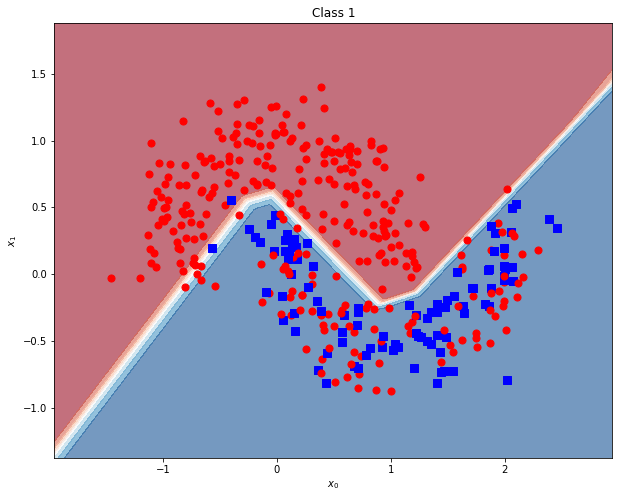

In [40]:
hbmp = HardBoostrappingMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          regularization=0,
                          training_epochs=200,
                          class_weight=None,
                          betas=[0.5, 1],
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), hbmp)

## The effect of unlabelled example weight

In [ ]:
n_input = 2
n_classes = 2


n_iters = 10

args_list = []
for it in range(n_iters):
    
    X, y = datasets.make_moons(n_samples=800, noise=0.2)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.5, random_state=42)
    Y_train = np.eye(n_classes)[y_train]
    Y_train_pu = get_PU_labels(Y_train, random_seed=42, verbose=False)
    
    for pct_missing in Y_train_pu.keys():
        for w_unl in np.arange(0.1, 1.01, 0.1):
            for clsf in ['mlp', 'hardb_mlp', 'clsdep_mlp']:
                data = {}
                data["X_train"] = X_train
                data["Y_train"] = Y_train_pu[pct_missing]
                data["X_test"] = X_test
                data["y_test"] = y_test
                data["pct_missing"] = pct_missing
                data["clsf"] = clsf
                data["w_unlabelled"] = w_unl
                args_list.append(data)

def fit_classifier(args):
    pct_missing = args['pct_missing']
    w_unlabelled = args['w_unlabelled']
    
    X_train = args["X_train"]
    Y_train = args["Y_train"]
    X_test = args["X_test"]
    y_test = args["y_test"]
    
    clsf = args["clsf"]
    if clsf == 'mlp':
        classifier = MultilayerPerceptron(n_input=n_input,
              n_classes=n_classes,
              n_hiddens=[8, 8],
              learning_rate=5e-3,
              regularization=0,
              training_epochs=200,
              class_weight=[w_unlabelled, 1],
              imbalanced=True,
              verbose=False)
    elif clsf == 'hardb_mlp':
        classifier = HardBoostrappingMultilayerPerceptron(n_input=n_input,
              n_classes=n_classes,
              n_hiddens=[8, 8],
              learning_rate=5e-3,
              regularization=0,
              training_epochs=200,
              class_weight=None,
              betas=[w_unlabelled, 1],
              imbalanced=True,
              verbose=False)
    elif clsf == 'clsdep_mlp':
        classifier = ClassDepLossMultilayerPerceptron(n_input=n_input,
              n_classes=n_classes,
              n_hiddens=[8, 8],
              learning_rate=5e-3,
              regularization=0,
              training_epochs=200,
              class_weight=[w_unlabelled, 1],
              imbalanced=True,
              verbose=False)
    print("Fitting:", clsf, "Missing:", pct_missing, "Unlabelled weight:", w_unlabelled)
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    auc = metrics.roc_auc_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Got", "AUC:", auc, "F1-score:", f1, "Accuracy:", acc)
    record = {}
    record['%missing'] = pct_missing
    record['w_unlabelled'] = w_unlabelled
    record["classifier"] = clsf
    record['AUC'] = auc
    record['F1-score'] = f1
    record['Accuracy'] = acc
    return record

import pandas as pd
from multiprocessing import Pool
pool = Pool(processes=6)
acc_grid_list = pool.map(fit_classifier, args_list)
acc_grid = pd.DataFrame(acc_grid_list)
acc_grid.to_csv("weighted_unlabelled_moons.csv")

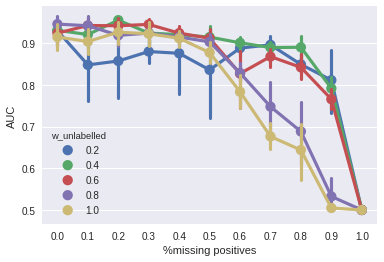

In [7]:
import seaborn as sns
%matplotlib inline
f, ax = plt.subplots(1)


sns.pointplot(x='%missing', y='AUC', hue='w_unlabelled', data=acc_grid[acc_grid['w_unlabelled'].isin([0.2, 0.4, 0.6, 0.8, 1.0])], ax=ax)
ax.set_xlabel('%missing positives')
ax.set_ylabel('AUC')